In [28]:
from apyori import apriori
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Полезные функции

In [19]:
def isnan(value):
    return value is None or value != value

In [29]:
def analyze(series, categorical: bool = None):
    if isinstance(series, pd.DataFrame):
        series = series.iloc[:, 0]

    series_unique = sorted(series.unique())

    if categorical is None:
        categorical = len(series_unique) < 30

    max_len = 10

    print(
        f"unique: {len(series_unique)}",
        f"empty: {sum([isnan(el) for el in series])}",
        f"filled: {sum([not isnan(el) for el in series])},",
        f"values: {list(series_unique[:max_len]) + [] if len(series_unique) < max_len else ['...']}" if categorical else ""
    )
    if categorical:
        for val in series_unique[:max_len]:
            if isnan(val):
                print(f"{val} - {sum(series.isna())} times")
            else:
                print(f"{val} - {sum(series == val)} times")
        if len(series_unique) < 30:
            series.hist(xrot=-30)
    else:
        print(f"min: {series.min()}, mean: {series.mean()}, max: {series.max()}, std: {series.std()}")
        series.hist()
    plt.show()

# Считаем данные по заявкам

In [13]:
df = pd.read_excel('output.xlsx', sheet_name='Applications')
df

,Unnamed: 0,lot_guid,lot_initial_sum,lot_commodity_price,lot_max_contract_price,lot_non_price,lot_currency_code,application_date,application_not_dishonest,application_provider,supplier_guid,supplier_inn,supplier_name,supplier_ogrn,supplier_type,application_price,application_currency_code,application_accepted,application_rejection_reason_code,application_winner_indication,application_contract_signed,application_additional_price,application_rating,application_assessment_result,application_commission_decision_place
0,0,001180aa-ec39-fe24-e63b-de59c6c8b320,532546.68,NaN,NaN,NaN,RUB,2021-09-29 11:18:52,1,1,1c9f992c-e5ef-45c3-9a26-5cae096c0914,5005005770,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ФАБИ""",1.035001e+12,Юридическое лицо,528360.00,RUB,Допущен,NaN,NaN,NaN,NaN,NaN,3.0,3.0
1,1,001180aa-ec39-fe24-e63b-de59c6c8b320,532546.68,NaN,NaN,NaN,RUB,2021-09-30 09:40:50,1,1,5ea6fc6f-832d-4ffb-b16e-dc6dd159a4c6,7717729216,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ВЫСОКОВОЛЬТНЫЕ СИСТЕМЫ И СЕТИ""",1.127747e+12,Юридическое лицо,528179.80,RUB,Допущен,NaN,NaN,1.0,NaN,NaN,1.0,1.0
2,2,001180aa-ec39-fe24-e63b-de59c6c8b320,532546.68,NaN,NaN,NaN,RUB,2021-09-30 06:20:07,1,1,d9ce1e3e-75d0-45b3-abcc-86d3f5fd5066,7703755745,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ИНЖЕНЕРНОЕ БЮРО""",1.117747e+12,Юридическое лицо,528286.31,RUB,Допущен,NaN,NaN,NaN,NaN,NaN,2.0,2.0
3,3,001180aa-ec39-fe24-e63b-de59c6c8b320,532546.68,NaN,NaN,NaN,RUB,2021-09-30 08:31:16,1,1,f6d6a2c5-0644-4bf6-b351-55d43380fd02,7813337589,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""КОНЦЕРН ""ЛЕНПРОМСТРОЙ""",1.057813e+12,Юридическое лицо,532546.68,RUB,Допущен,NaN,NaN,NaN,NaN,NaN,4.0,4.0
4,4,002db7ef-9ca6-4b69-abce-04c3b9b7a06a,201605.00,NaN,NaN,0.0,RUB,2020-07-31 08:00:00,1,0,796b9df1-59ad-4f1e-9069-0dc84b229d88,6452925517,Общество с ограниченной ответственностью «СОК»,1.066450e+12,Юридическое лицо,201605.00,RUB,Допущен,STRUCTURE_CONTENT_DESIGN,NaN,1.0,201605.00,1.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4717,4717,ff8fe63f-bf6c-4a95-b8f3-c7d10862d11d,405650.00,NaN,NaN,0.0,RUB,2020-09-24 05:45:00,1,0,64b75fbb-16f5-458a-a550-3b2eb5939fc6,6658482153,"ООО ""Форум""",1.169658e+12,Юридическое лицо,405650.00,RUB,Допущен,STRUCTURE_CONTENT_DESIGN,NaN,1.0,NaN,NaN,NaN,0.0
4718,4718,ffaa3d53-69f7-48e7-a679-8cbc44eb7bbd,7356621.88,NaN,NaN,0.0,RUB,2020-11-13 19:40:00,1,1,48a73f6e-5714-4792-87c3-0ffd0597131d,7725628067,"ООО ""БионаФарм""",1.087746e+12,Юридическое лицо,7356621.88,RUB,Допущен,STRUCTURE_CONTENT_DESIGN,NaN,1.0,7356621.88,1.0,NaN,1.0
4719,4719,ffb5bde5-3196-49ec-b1d8-9385a4bed2d0,2050145.44,NaN,NaN,0.0,RUB,2020-11-30 12:30:00,1,1,48a73f6e-5714-4792-87c3-0ffd0597131d,7725628067,"ООО ""БионаФарм""",1.087746e+12,Юридическое лицо,2050145.44,RUB,Допущен,STRUCTURE_CONTENT_DESIGN,NaN,1.0,2050145.44,1.0,NaN,1.0
4720,4720,ffe29952-0bec-4deb-8422-0a118b0842e7,525000.00,NaN,NaN,0.0,RUB,2021-09-29 08:00:00,1,0,dbd4a182-5e48-4976-8016-510706a4f1cf,4003032047,Общество с ограниченной ответственностью «Торговый дом БФ»,1.114025e+12,Юридическое лицо,525000.00,RUB,Допущен,STRUCTURE_CONTENT_DESIGN,NaN,1.0,NaN,NaN,NaN,1.0


# Сгруппируем по лоту и объединим ИНН поставщиков в списки

In [14]:
lot_suppliers = df.groupby('lot_guid', dropna=False)['supplier_inn'].apply(list).reset_index()
lot_suppliers

,lot_guid,supplier_inn
0,001180aa-ec39-fe24-e63b-de59c6c8b320,"[5005005770, 7717729216, 7703755745, 7813337589]"
1,002db7ef-9ca6-4b69-abce-04c3b9b7a06a,[6452925517]
2,002e39a4-d83c-48e4-90a8-37f4cb45fecd,[5001000041]
3,00305ade-c747-4999-b604-f4146cd4025d,[551200523301]
4,0046cc75-3f65-47db-be53-2ad0ce7b202c,[7453040371]
...,...,...
3538,ff8fe63f-bf6c-4a95-b8f3-c7d10862d11d,[6658482153]
3539,ffaa3d53-69f7-48e7-a679-8cbc44eb7bbd,[7725628067]
3540,ffb5bde5-3196-49ec-b1d8-9385a4bed2d0,[7725628067]
3541,ffe29952-0bec-4deb-8422-0a118b0842e7,[4003032047]


In [15]:
all_transactions = list(lot_suppliers['supplier_inn'])
transactions = []
for lot_placers in all_transactions:
    if len(lot_placers) > 1:
        transactions.append(lot_placers)
print(f'Лотов с одной заявкой {len(all_transactions) - len(transactions)} из {len(all_transactions)}')
transactions

Лотов с одной заявкой 3011 из 3543


[[5005005770, 7717729216, 7703755745, 7813337589],
 [7802804922, 7802804922],
 [7723733387, 7723733387],
 [7727194344, 7727194344],
 [5401299940, 5401299940],
 [720701864459, 7270661872],
 [7203267323, 720402637987, 7203380270],
 [7717764683, 7202154101, 7726311464],
 [7718538045, 5050126375, 7725290162],
 [745312780529, 6685094015, 7839438140],
 [7203490314, 7202189513, 6670300868],
 [6820008689, 6829105486, 6829008690],
 [2720007130, 2720007130],
 [7716082078, 9717068979],
 [2315155876, 2315137612],
 [1435153822, 1435153822],
 [9709066022, 5020081790],
 [7203527162, 470417498169, 7801694579],
 [7726311464, 7204032814, 7203385574],
 [3664245050,
  2901259394,
  2901259235,
  7726726444,
  744804320884,
  744804320884,
  3664245050,
  2901259394,
  2901259235,
  7726726444],
 [6141053140, 615520705111, 6167125819],
 [3662127974, 3662127974],
 [7720263905, 7720024671, 7731399866],
 [2801019254, 2801019254],
 [7325001930, 7325001930],
 [8904086158, 8904086158, 8904086158],
 [2801019254, 

In [16]:
# насколкьо "сильные" правила мы хотим получить
# min_support -- минимальный support для правил (dtype = float).
# min_confidence -- минимальное значение confidence для правил (dtype = float)
# min_lift -- минимальный lift (dtype = float)
# max_length -- максимальная длина itemset (вспоминаем про k-itemset)  (dtype = integer)
l = list(apriori(transactions, min_support = 0.01, min_confidence = 0.2, min_lift = 4, min_length = 2, max_length=3))
places_groups = [set(i.items) for i in l]
places_groups

[{5050126375, 7718538045},
 {5408130693, 6670300868},
 {6670300868, 7202189513},
 {6670300868, 7203490314},
 {6673215650, 7202062972},
 {6673215650, 7203488001},
 {7202062972, 7203488001},
 {7202189513, 7203490314},
 {7202236210, 7203165794},
 {7202236210, 7203233518},
 {7203165794, 7203233518},
 {7203385574, 7204032814},
 {7203385574, 7726311464},
 {7204032814, 7726311464},
 {7717764683, 7726311464},
 {6670300868, 7202189513, 7203490314},
 {6673215650, 7202062972, 7203488001},
 {7202236210, 7203165794, 7203233518},
 {7203385574, 7204032814, 7726311464}]

# Считаем признаки для лотов

In [18]:
df.columns

Index(['Unnamed: 0', 'lot_guid', 'lot_initial_sum', 'lot_commodity_price',
       'lot_max_contract_price', 'lot_non_price', 'lot_currency_code',
       'application_date', 'application_not_dishonest', 'application_provider',
       'supplier_guid', 'supplier_inn', 'supplier_name', 'supplier_ogrn',
       'supplier_type', 'application_price', 'application_currency_code',
       'application_accepted', 'application_rejection_reason_code',
       'application_winner_indication', 'application_contract_signed',
       'application_additional_price', 'application_rating',
       'application_assessment_result',
       'application_commission_decision_place'],
      dtype='object')

In [22]:
df['real_initial_sum'] = df.apply(
    lambda row: row['lot_initial_sum'] if not isnan(row['lot_initial_sum']) else
    row['lot_max_contract_price'] if not isnan(row['lot_max_contract_price']) else row['lot_commodity_price'],
    axis=1
)
df.dropna(subset=['real_initial_sum'], inplace=True)
df.drop(df[df['real_initial_sum'] == 0].index, inplace=True)
df

,Unnamed: 0,lot_guid,lot_initial_sum,lot_commodity_price,lot_max_contract_price,lot_non_price,lot_currency_code,application_date,application_not_dishonest,application_provider,supplier_guid,supplier_inn,supplier_name,supplier_ogrn,supplier_type,application_price,application_currency_code,application_accepted,application_rejection_reason_code,application_winner_indication,application_contract_signed,application_additional_price,application_rating,application_assessment_result,application_commission_decision_place,real_initial_sum
0,0,001180aa-ec39-fe24-e63b-de59c6c8b320,532546.68,NaN,NaN,NaN,RUB,2021-09-29 11:18:52,1,1,1c9f992c-e5ef-45c3-9a26-5cae096c0914,5005005770,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ФАБИ""",1.035001e+12,Юридическое лицо,528360.00,RUB,Допущен,NaN,NaN,NaN,NaN,NaN,3.0,3.0,532546.68
1,1,001180aa-ec39-fe24-e63b-de59c6c8b320,532546.68,NaN,NaN,NaN,RUB,2021-09-30 09:40:50,1,1,5ea6fc6f-832d-4ffb-b16e-dc6dd159a4c6,7717729216,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ВЫСОКОВОЛЬТНЫЕ СИСТЕМЫ И СЕТИ""",1.127747e+12,Юридическое лицо,528179.80,RUB,Допущен,NaN,NaN,1.0,NaN,NaN,1.0,1.0,532546.68
2,2,001180aa-ec39-fe24-e63b-de59c6c8b320,532546.68,NaN,NaN,NaN,RUB,2021-09-30 06:20:07,1,1,d9ce1e3e-75d0-45b3-abcc-86d3f5fd5066,7703755745,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ИНЖЕНЕРНОЕ БЮРО""",1.117747e+12,Юридическое лицо,528286.31,RUB,Допущен,NaN,NaN,NaN,NaN,NaN,2.0,2.0,532546.68
3,3,001180aa-ec39-fe24-e63b-de59c6c8b320,532546.68,NaN,NaN,NaN,RUB,2021-09-30 08:31:16,1,1,f6d6a2c5-0644-4bf6-b351-55d43380fd02,7813337589,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""КОНЦЕРН ""ЛЕНПРОМСТРОЙ""",1.057813e+12,Юридическое лицо,532546.68,RUB,Допущен,NaN,NaN,NaN,NaN,NaN,4.0,4.0,532546.68
4,4,002db7ef-9ca6-4b69-abce-04c3b9b7a06a,201605.00,NaN,NaN,0.0,RUB,2020-07-31 08:00:00,1,0,796b9df1-59ad-4f1e-9069-0dc84b229d88,6452925517,Общество с ограниченной ответственностью «СОК»,1.066450e+12,Юридическое лицо,201605.00,RUB,Допущен,STRUCTURE_CONTENT_DESIGN,NaN,1.0,201605.00,1.0,NaN,1.0,201605.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4717,4717,ff8fe63f-bf6c-4a95-b8f3-c7d10862d11d,405650.00,NaN,NaN,0.0,RUB,2020-09-24 05:45:00,1,0,64b75fbb-16f5-458a-a550-3b2eb5939fc6,6658482153,"ООО ""Форум""",1.169658e+12,Юридическое лицо,405650.00,RUB,Допущен,STRUCTURE_CONTENT_DESIGN,NaN,1.0,NaN,NaN,NaN,0.0,405650.00
4718,4718,ffaa3d53-69f7-48e7-a679-8cbc44eb7bbd,7356621.88,NaN,NaN,0.0,RUB,2020-11-13 19:40:00,1,1,48a73f6e-5714-4792-87c3-0ffd0597131d,7725628067,"ООО ""БионаФарм""",1.087746e+12,Юридическое лицо,7356621.88,RUB,Допущен,STRUCTURE_CONTENT_DESIGN,NaN,1.0,7356621.88,1.0,NaN,1.0,7356621.88
4719,4719,ffb5bde5-3196-49ec-b1d8-9385a4bed2d0,2050145.44,NaN,NaN,0.0,RUB,2020-11-30 12:30:00,1,1,48a73f6e-5714-4792-87c3-0ffd0597131d,7725628067,"ООО ""БионаФарм""",1.087746e+12,Юридическое лицо,2050145.44,RUB,Допущен,STRUCTURE_CONTENT_DESIGN,NaN,1.0,2050145.44,1.0,NaN,1.0,2050145.44
4720,4720,ffe29952-0bec-4deb-8422-0a118b0842e7,525000.00,NaN,NaN,0.0,RUB,2021-09-29 08:00:00,1,0,dbd4a182-5e48-4976-8016-510706a4f1cf,4003032047,Общество с ограниченной ответственностью «Торговый дом БФ»,1.114025e+12,Юридическое лицо,525000.00,RUB,Допущен,STRUCTURE_CONTENT_DESIGN,NaN,1.0,NaN,NaN,NaN,1.0,525000.00


In [25]:
df['supplier_price'] = df.apply(
    lambda row: row['application_price'] if not isnan(row['application_price']) else row['application_additional_price'],
    axis=1
)
df.dropna(subset=['supplier_price'], inplace=True)
df

,Unnamed: 0,lot_guid,lot_initial_sum,lot_commodity_price,lot_max_contract_price,lot_non_price,lot_currency_code,application_date,application_not_dishonest,application_provider,supplier_guid,supplier_inn,supplier_name,supplier_ogrn,supplier_type,application_price,application_currency_code,application_accepted,application_rejection_reason_code,application_winner_indication,application_contract_signed,application_additional_price,application_rating,application_assessment_result,application_commission_decision_place,real_initial_sum,supplier_price
0,0,001180aa-ec39-fe24-e63b-de59c6c8b320,532546.68,NaN,NaN,NaN,RUB,2021-09-29 11:18:52,1,1,1c9f992c-e5ef-45c3-9a26-5cae096c0914,5005005770,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ФАБИ""",1.035001e+12,Юридическое лицо,528360.00,RUB,Допущен,NaN,NaN,NaN,NaN,NaN,3.0,3.0,532546.68,528360.00
1,1,001180aa-ec39-fe24-e63b-de59c6c8b320,532546.68,NaN,NaN,NaN,RUB,2021-09-30 09:40:50,1,1,5ea6fc6f-832d-4ffb-b16e-dc6dd159a4c6,7717729216,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ВЫСОКОВОЛЬТНЫЕ СИСТЕМЫ И СЕТИ""",1.127747e+12,Юридическое лицо,528179.80,RUB,Допущен,NaN,NaN,1.0,NaN,NaN,1.0,1.0,532546.68,528179.80
2,2,001180aa-ec39-fe24-e63b-de59c6c8b320,532546.68,NaN,NaN,NaN,RUB,2021-09-30 06:20:07,1,1,d9ce1e3e-75d0-45b3-abcc-86d3f5fd5066,7703755745,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ИНЖЕНЕРНОЕ БЮРО""",1.117747e+12,Юридическое лицо,528286.31,RUB,Допущен,NaN,NaN,NaN,NaN,NaN,2.0,2.0,532546.68,528286.31
3,3,001180aa-ec39-fe24-e63b-de59c6c8b320,532546.68,NaN,NaN,NaN,RUB,2021-09-30 08:31:16,1,1,f6d6a2c5-0644-4bf6-b351-55d43380fd02,7813337589,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""КОНЦЕРН ""ЛЕНПРОМСТРОЙ""",1.057813e+12,Юридическое лицо,532546.68,RUB,Допущен,NaN,NaN,NaN,NaN,NaN,4.0,4.0,532546.68,532546.68
4,4,002db7ef-9ca6-4b69-abce-04c3b9b7a06a,201605.00,NaN,NaN,0.0,RUB,2020-07-31 08:00:00,1,0,796b9df1-59ad-4f1e-9069-0dc84b229d88,6452925517,Общество с ограниченной ответственностью «СОК»,1.066450e+12,Юридическое лицо,201605.00,RUB,Допущен,STRUCTURE_CONTENT_DESIGN,NaN,1.0,201605.00,1.0,NaN,1.0,201605.00,201605.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4717,4717,ff8fe63f-bf6c-4a95-b8f3-c7d10862d11d,405650.00,NaN,NaN,0.0,RUB,2020-09-24 05:45:00,1,0,64b75fbb-16f5-458a-a550-3b2eb5939fc6,6658482153,"ООО ""Форум""",1.169658e+12,Юридическое лицо,405650.00,RUB,Допущен,STRUCTURE_CONTENT_DESIGN,NaN,1.0,NaN,NaN,NaN,0.0,405650.00,405650.00
4718,4718,ffaa3d53-69f7-48e7-a679-8cbc44eb7bbd,7356621.88,NaN,NaN,0.0,RUB,2020-11-13 19:40:00,1,1,48a73f6e-5714-4792-87c3-0ffd0597131d,7725628067,"ООО ""БионаФарм""",1.087746e+12,Юридическое лицо,7356621.88,RUB,Допущен,STRUCTURE_CONTENT_DESIGN,NaN,1.0,7356621.88,1.0,NaN,1.0,7356621.88,7356621.88
4719,4719,ffb5bde5-3196-49ec-b1d8-9385a4bed2d0,2050145.44,NaN,NaN,0.0,RUB,2020-11-30 12:30:00,1,1,48a73f6e-5714-4792-87c3-0ffd0597131d,7725628067,"ООО ""БионаФарм""",1.087746e+12,Юридическое лицо,2050145.44,RUB,Допущен,STRUCTURE_CONTENT_DESIGN,NaN,1.0,2050145.44,1.0,NaN,1.0,2050145.44,2050145.44
4720,4720,ffe29952-0bec-4deb-8422-0a118b0842e7,525000.00,NaN,NaN,0.0,RUB,2021-09-29 08:00:00,1,0,dbd4a182-5e48-4976-8016-510706a4f1cf,4003032047,Общество с ограниченной ответственностью «Торговый дом БФ»,1.114025e+12,Юридическое лицо,525000.00,RUB,Допущен,STRUCTURE_CONTENT_DESIGN,NaN,1.0,NaN,NaN,NaN,1.0,525000.00,525000.00


In [26]:
df['application_economy'] = df.apply(
    lambda row: row['real_initial_sum'] - row['application_price'],
    axis=1
)
df['application_economy_percent'] = df.apply(
    lambda row: row['application_economy'] / row['real_initial_sum'],
    axis=1
)
df

,Unnamed: 0,lot_guid,lot_initial_sum,lot_commodity_price,lot_max_contract_price,lot_non_price,lot_currency_code,application_date,application_not_dishonest,application_provider,supplier_guid,supplier_inn,supplier_name,supplier_ogrn,supplier_type,application_price,application_currency_code,application_accepted,application_rejection_reason_code,application_winner_indication,application_contract_signed,application_additional_price,application_rating,application_assessment_result,application_commission_decision_place,real_initial_sum,supplier_price,application_economy,application_economy_percent
0,0,001180aa-ec39-fe24-e63b-de59c6c8b320,532546.68,NaN,NaN,NaN,RUB,2021-09-29 11:18:52,1,1,1c9f992c-e5ef-45c3-9a26-5cae096c0914,5005005770,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ФАБИ""",1.035001e+12,Юридическое лицо,528360.00,RUB,Допущен,NaN,NaN,NaN,NaN,NaN,3.0,3.0,532546.68,528360.00,4186.68,0.007862
1,1,001180aa-ec39-fe24-e63b-de59c6c8b320,532546.68,NaN,NaN,NaN,RUB,2021-09-30 09:40:50,1,1,5ea6fc6f-832d-4ffb-b16e-dc6dd159a4c6,7717729216,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ВЫСОКОВОЛЬТНЫЕ СИСТЕМЫ И СЕТИ""",1.127747e+12,Юридическое лицо,528179.80,RUB,Допущен,NaN,NaN,1.0,NaN,NaN,1.0,1.0,532546.68,528179.80,4366.88,0.008200
2,2,001180aa-ec39-fe24-e63b-de59c6c8b320,532546.68,NaN,NaN,NaN,RUB,2021-09-30 06:20:07,1,1,d9ce1e3e-75d0-45b3-abcc-86d3f5fd5066,7703755745,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ИНЖЕНЕРНОЕ БЮРО""",1.117747e+12,Юридическое лицо,528286.31,RUB,Допущен,NaN,NaN,NaN,NaN,NaN,2.0,2.0,532546.68,528286.31,4260.37,0.008000
3,3,001180aa-ec39-fe24-e63b-de59c6c8b320,532546.68,NaN,NaN,NaN,RUB,2021-09-30 08:31:16,1,1,f6d6a2c5-0644-4bf6-b351-55d43380fd02,7813337589,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""КОНЦЕРН ""ЛЕНПРОМСТРОЙ""",1.057813e+12,Юридическое лицо,532546.68,RUB,Допущен,NaN,NaN,NaN,NaN,NaN,4.0,4.0,532546.68,532546.68,0.00,0.000000
4,4,002db7ef-9ca6-4b69-abce-04c3b9b7a06a,201605.00,NaN,NaN,0.0,RUB,2020-07-31 08:00:00,1,0,796b9df1-59ad-4f1e-9069-0dc84b229d88,6452925517,Общество с ограниченной ответственностью «СОК»,1.066450e+12,Юридическое лицо,201605.00,RUB,Допущен,STRUCTURE_CONTENT_DESIGN,NaN,1.0,201605.00,1.0,NaN,1.0,201605.00,201605.00,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4717,4717,ff8fe63f-bf6c-4a95-b8f3-c7d10862d11d,405650.00,NaN,NaN,0.0,RUB,2020-09-24 05:45:00,1,0,64b75fbb-16f5-458a-a550-3b2eb5939fc6,6658482153,"ООО ""Форум""",1.169658e+12,Юридическое лицо,405650.00,RUB,Допущен,STRUCTURE_CONTENT_DESIGN,NaN,1.0,NaN,NaN,NaN,0.0,405650.00,405650.00,0.00,0.000000
4718,4718,ffaa3d53-69f7-48e7-a679-8cbc44eb7bbd,7356621.88,NaN,NaN,0.0,RUB,2020-11-13 19:40:00,1,1,48a73f6e-5714-4792-87c3-0ffd0597131d,7725628067,"ООО ""БионаФарм""",1.087746e+12,Юридическое лицо,7356621.88,RUB,Допущен,STRUCTURE_CONTENT_DESIGN,NaN,1.0,7356621.88,1.0,NaN,1.0,7356621.88,7356621.88,0.00,0.000000
4719,4719,ffb5bde5-3196-49ec-b1d8-9385a4bed2d0,2050145.44,NaN,NaN,0.0,RUB,2020-11-30 12:30:00,1,1,48a73f6e-5714-4792-87c3-0ffd0597131d,7725628067,"ООО ""БионаФарм""",1.087746e+12,Юридическое лицо,2050145.44,RUB,Допущен,STRUCTURE_CONTENT_DESIGN,NaN,1.0,2050145.44,1.0,NaN,1.0,2050145.44,2050145.44,0.00,0.000000
4720,4720,ffe29952-0bec-4deb-8422-0a118b0842e7,525000.00,NaN,NaN,0.0,RUB,2021-09-29 08:00:00,1,0,dbd4a182-5e48-4976-8016-510706a4f1cf,4003032047,Общество с ограниченной ответственностью «Торговый дом БФ»,1.114025e+12,Юридическое лицо,525000.00,RUB,Допущен,STRUCTURE_CONTENT_DESIGN,NaN,1.0,NaN,NaN,NaN,1.0,525000.00,525000.00,0.00,0.000000


unique: 1179 empty: 0 filled: 4628, 
min: -0.8994285714285715, mean: 0.0687666572152241, max: 0.9999998512851624, std: 0.2287793116978106


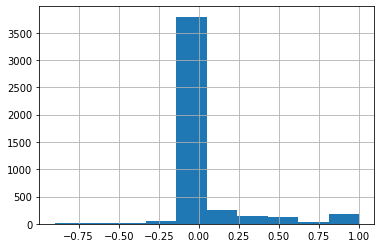

In [31]:
analyze(df[df['application_economy_percent'] > -1]['application_economy_percent'])